## Assignment 2 

### Onset Detector 

Sometimes its useful to find where events in a musical file occurred, these are often called **onsets**. 

They are often characterised by a **peak in the signal** of the audio. 

The simplest approach would be to record every sample above a given threshold as a new onset.

However, these **onsets** and their peaks often occur over a length of time, and so the signal may be above a chosen threshold for a number of samples, but we want to identify these as **a single event**. 

As we step through the signal (sample by sample), there are a number of rules we can apply to determine if something is a **new onset** 

### The Algorithm


1. Is the sample value larger than any of the values surrounding it (+ / - a ``window_size``)?


2. Is the sample value larger than the average of all the values surrounding it (+ / - a ``window_size``)?


3. Have we had a onset recently (within a given ``wait_time``)?


### Task 1

Code an onset detector using the algorithm described above. We have provided a template of an approach you might like to take below. 

We want to save the onsets as we go (the sample location and the value) and then plot them on the **same plot as the original waveform**

The result should look like this (with the audio data in blue and onsets in orange).

There are libraries that will find onsets for you, but we would like you to this yourself implementing the algorithm described!

![alt text](onsets.png)

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
audio_data, sr = librosa.load('audio/drums0.wav')

In [3]:
window_size = 2048
wait_time = 1024

# The nest line of code declares a ctr variable for later use.

ctr = 0

# The next line of code declares a retain list for later use.
# This part of the code was suggested by Lieven Van Velthoven, he is a technician at UAL:
retain = []

# The next line of code declares a sample_index list for later use.

sample_index = []
# End of Lieven's suggestions

# The next line of code goes through every sample of the audio file and for accounts for the window size 
# at the beginning and end.

# This part of the code was suggested by Lieven Van Velthoven, he is a technician at UAL:
for i, sample in enumerate(audio_data[window_size:-window_size]):
# End of Lieven's suggestions
    
    # The next line of code declares and surrounding area list of the size of the window size 
    # which takes a slice of the audio file at index i by the size of the window size * 2 + i
    # every time the foor loops is ran. It therefore creates a surrounding area which advances by
    # i every time the foor lopps runs.
    
    # This part of the code was suggest by Louis McCallum:
    surrounding_area = audio_data[i:window_size*2+i]
    # End of Louis' suggestions
    
    # The next line of code finds the sample value which is biggest in surrounding and if this value has a value
    # has a bigger value than the mean of the surrounding area and checks and checks if we've had an onset recently.
    
    # This part of the code was suggest by Louis McCallum:
    if sample == np.max(surrounding_area) and sample > np.mean(surrounding_area) and ctr >= wait_time:
    # End of Louis' suggestions
        
        # The next line of code appends the sample value found from the line above and appends it to the
        # retain list.
        
        retain.append(sample)
        
        # The next line of code adds the value of index i + wait time together, this is required as otherwise
        # the sample index will be at the wrong index for later plotting. This value is then stored
        # in the sample_index list.
                
        # This part of the code was suggested by Lieven Van Velthoven, he is a technician at UAL:
        sample_index.append(i + window_size)
        # End of Lieven's suggestions
        
        # The next line of code resets ctr to 0
        
        ctr = 0
        
    else:
        
        # The next line of code add +1 to ctr
        
        ctr += 1
    

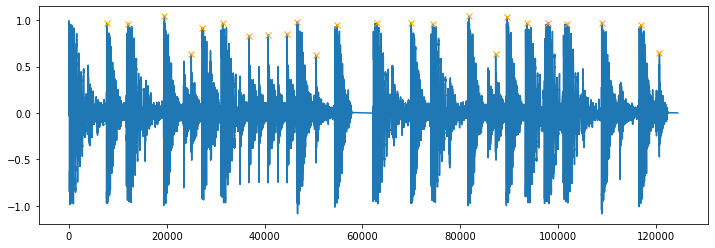

In [4]:
# This plots the audio file with the values retain(sample values i.e. peak values) 
# and sample index from above plotted over it.
# Code taken from week 3 of STEM lecture.

plt.figure(figsize=(12, 4))
plt.plot(audio_data)
plt.plot(sample_index, retain, 'x', color='orange')
plt.show()

### Task 2 


I have found that setting the window size to a value of 5100 finds less peaks lower value compared to the original value of 2048, changing the window size to lower values finds more peaks of lower lower values. Setting the window size to smaller value in that case helps to filter out the very small peaks. Setting the window to 5100 value only finds the highest peaks, wait time of zero at this size only misses 2 peaks which were found with settings 2048:1024. 100:1024 is actually finfing false peaks and is therefore not very advantageous. I would say the wait time is only advantageous for setting the window size at sizes of about 500 so as to keep the number of peak findings reasonable.